In [414]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
from datetime import date, timedelta
import warnings
warnings.filterwarnings('ignore')


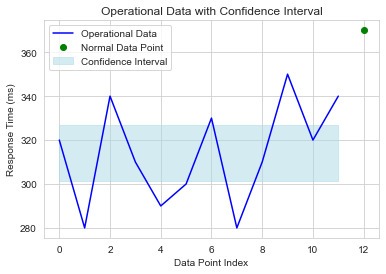

In [415]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Sample operational data (response time in milliseconds)
operational_data = [320, 280, 340, 310, 290, 300, 330, 280, 310, 350, 320, 340]

# Compute descriptive statistics
mean = np.mean(operational_data)
std_dev = np.std(operational_data)

# Set confidence level and calculate confidence interval
confidence_level = 0.95
alpha = 1 - confidence_level
z_score = stats.norm.ppf(1 - alpha/2)  # Two-tailed test
margin_of_error = z_score * std_dev / np.sqrt(len(operational_data))
confidence_interval = (mean - margin_of_error, mean + margin_of_error)

# Define thresholds for abnormal cases
upper_threshold = confidence_interval[1] + 2 * std_dev
lower_threshold = confidence_interval[0] - 2 * std_dev

# Simulate new data point (example)
new_data_point = 370

# Check if new data point is abnormal
is_abnormal = new_data_point > upper_threshold or new_data_point < lower_threshold

# Plot the operational data
plt.plot(range(len(operational_data)), operational_data, 'b-', label='Operational Data')

# Plot the confidence interval
plt.fill_between(range(len(operational_data)), confidence_interval[0], confidence_interval[1],
                 color='lightblue', alpha=0.5, label='Confidence Interval')

# Mark the abnormal data point if detected
if is_abnormal:
    plt.plot(len(operational_data), new_data_point, 'ro', label='Abnormal Data Point')
else:
    plt.plot(len(operational_data), new_data_point, 'go', label='Normal Data Point')

# Set labels and title
plt.xlabel('Data Point Index')
plt.ylabel('Response Time (ms)')
plt.title('Operational Data with Confidence Interval')

# Add legend
plt.legend()

# Show the plot
plt.show()


## Goal: XYZ is interested in using your actionable insights to help them identify the right company to make their investment.

## Read Data

In [416]:
## Cab_Data.csv – this file includes details of transaction for 2 cab companies
cab_data = pd.read_csv('Cab_Data.csv')

## Customer_ID.csv – this is a mapping table that contains a unique identifier
## which links the customer’s demographic details
Customer_ID = pd.read_csv('Customer_ID.csv')

## Transaction_ID.csv – this is a mapping table that contains transaction to 
## customer mapping and payment mode
Transaction_ID = pd.read_csv('Transaction_ID.csv')

## City.csv – this file contains list of US cities, their population and number of cab users
city = pd.read_csv('City.csv')

In [417]:
cab_data.shape

(359392, 7)

In [418]:
Customer_ID.shape

(49171, 4)

In [419]:
Transaction_ID.shape

(440098, 3)

In [420]:
city.shape

(20, 3)

## Check null values and dataframe information

In [421]:
cab_data.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [422]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [423]:
Customer_ID.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [424]:
Customer_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [425]:
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

In [426]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [427]:
Transaction_ID.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [428]:
Transaction_ID.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


#### There is no null values in each table

## Check data type and remove duplicates if needed

### cab_data

In [429]:
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


### Change Data of Travel column to datetime

In [430]:
print(cab_data['Date of Travel'].min())
print(cab_data['Date of Travel'].max())

42371
43465


In [431]:
cab_data = pd.read_csv('Cab_Data.csv')

In [432]:
## we have known that Time period of data is from 31/01/2016 to 31/12/2018.
from datetime import datetime
from datetime import date, timedelta
cab_data['Date of Travel'] = cab_data["Date of Travel"].apply(lambda x:(datetime(1899,12,29) + timedelta(x)).strftime('%d-%m-%Y'))

In [433]:
cab_data.head(5)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,07-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,05-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,01-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,06-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,02-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [434]:
# remove duplicates
cab_data = cab_data.drop_duplicates(keep="first")

### Customer_ID

In [435]:
Customer_ID = Customer_ID.drop_duplicates(keep="first")
Customer_ID.head(5)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


### Transaction_ID

In [436]:
Transaction_ID = Transaction_ID.drop_duplicates(keep="first")
Transaction_ID.head(5)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


### city

In [437]:
city = city.drop_duplicates(keep="first")
## remove commas in strings
city[['Population', 'Users']] = city[['Population', 'Users']].apply(lambda x: x.str.replace(',', ''))

## change population and users columns to numeric
city[['Population', 'Users']] = city[['Population', 'Users']].astype("int64")

In [438]:
city.head(5)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247


In [439]:
city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 640.0+ bytes


In [440]:
print('shape of cab_data:', cab_data.shape)
print('shape of Customer_ID:', Customer_ID.shape)
print('shape of Transaction_ID:', Transaction_ID.shape)
print('shape of city:', city.shape)

shape of cab_data: (359392, 7)
shape of Customer_ID: (49171, 4)
shape of Transaction_ID: (440098, 3)
shape of city: (20, 3)


In [441]:
7 + 3+2+2

14

## Merge whole datasets together

In [442]:
## merge cab_data and Transaction_ID
df_cab_tran = pd.merge(cab_data, Transaction_ID, on='Transaction ID')

## merge new table with Customer_ID
df_new_customer = pd.merge(df_cab_tran, Customer_ID, on = 'Customer ID')

# merge new table with city
df_final = pd.merge(df_new_customer, city, on = 'City')

In [443]:
df_final.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,07-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701
1,10351127,20-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701
2,10412921,22-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701


In [444]:
## add profit column by using price charged - cost of trip 
import datetime as dt
df_final['profit'] = df_final['Price Charged'] - df_final['Cost of Trip']
df_final['Year'] = df_final['Date of Travel'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').year)
df_final['month'] = df_final['Date of Travel'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').month)
df_final['day'] = df_final['Date of Travel'].apply(lambda x: datetime.strptime(x, '%d-%m-%Y').day)

In [445]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  object 
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  int64  
 13  Users               359392 non-null  int64  
 14  profit              359392 non-null  float64
 15  Year                359392 non-nul

In [446]:
df_final.shape

(359392, 18)

In [447]:
df_final

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,Year,month,day
0,10000011,07-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,1,7
1,10351127,20-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,20
2,10412921,22-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,22
3,10000012,05-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,1,5
4,10320494,20-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,02-03-2018,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018,3,2
359388,10319775,12-04-2018,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018,4,12
359389,10347676,05-07-2018,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,7,5
359390,10358624,01-08-2018,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018,8,1


## Data Visualization

In [448]:
df_final['Company'].unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [449]:
df_final.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month),Population,Users,profit,Year,month,day
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937,3.132198e+06,158365.582267,137.253198,2017.041693,7.509243,15.641700
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482,3.315194e+06,100850.051020,160.311840,0.801378,3.428929,8.838986
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000,2.489680e+05,3643.000000,-220.060000,2016.000000,1.000000,1.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000,6.712380e+05,80021.000000,28.012000,2016.000000,5.000000,8.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000,1.595037e+06,144132.000000,81.962000,2017.000000,8.000000,16.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000,8.405837e+06,302149.000000,190.030000,2018.000000,11.000000,23.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000,8.405837e+06,302149.000000,1463.966000,2018.000000,12.000000,31.000000


## 1. Correlations

<AxesSubplot:>

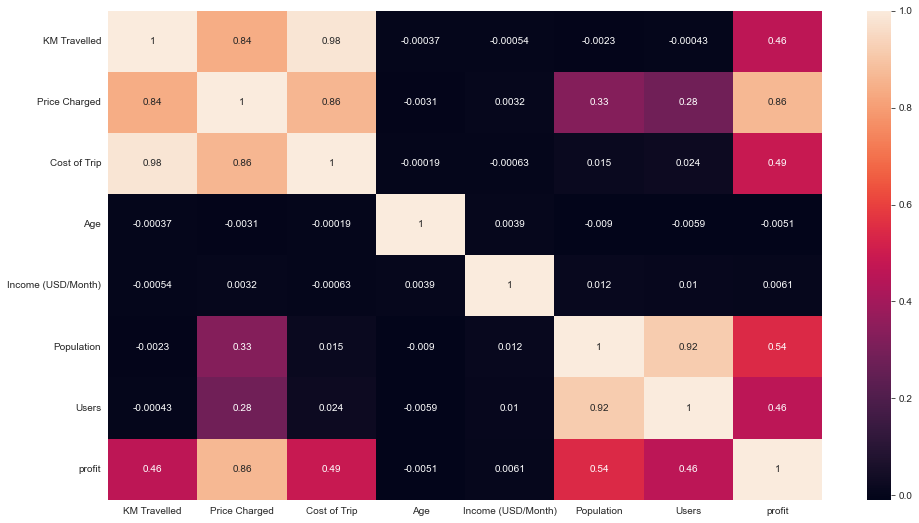

In [450]:
## check correlation
plt.figure(figsize=(16,9))
sns.heatmap(df_final[['KM Travelled', 'Price Charged', 'Cost of Trip', 'Age', \
                      'Income (USD/Month)', 'Population', 'Users', 'profit']].corr(), \
            annot=True)

#### There are serveral high correlations: KM Travelled vs. Price Charged vs. Cost of Trip; Populations vs. Users.
#### On the other hand, KM travelled/price charged/ cost of trip doesn't depend on customers' age or income. It acutally surprises me. 

In [451]:
df_final

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users,profit,Year,month,day
0,10000011,07-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,29290,Card,Male,28,10813,814885,24701,57.3150,2016,1,7
1,10351127,20-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,29290,Cash,Male,28,10813,814885,24701,281.2772,2018,7,20
2,10412921,22-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,29290,Card,Male,28,10813,814885,24701,194.6480,2018,11,22
3,10000012,05-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,27703,Card,Male,27,9237,814885,24701,23.6660,2016,1,5
4,10320494,20-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,27703,Card,Male,27,9237,814885,24701,253.9808,2018,4,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10307228,02-03-2018,Yellow Cab,WASHINGTON DC,38.40,668.93,525.3120,51406,Cash,Female,29,6829,418859,127001,143.6180,2018,3,2
359388,10319775,12-04-2018,Yellow Cab,WASHINGTON DC,3.57,67.60,44.5536,51406,Cash,Female,29,6829,418859,127001,23.0464,2018,4,12
359389,10347676,05-07-2018,Yellow Cab,WASHINGTON DC,23.46,331.97,337.8240,51406,Card,Female,29,6829,418859,127001,-5.8540,2018,7,5
359390,10358624,01-08-2018,Yellow Cab,WASHINGTON DC,27.60,358.23,364.3200,51406,Cash,Female,29,6829,418859,127001,-6.0900,2018,8,1


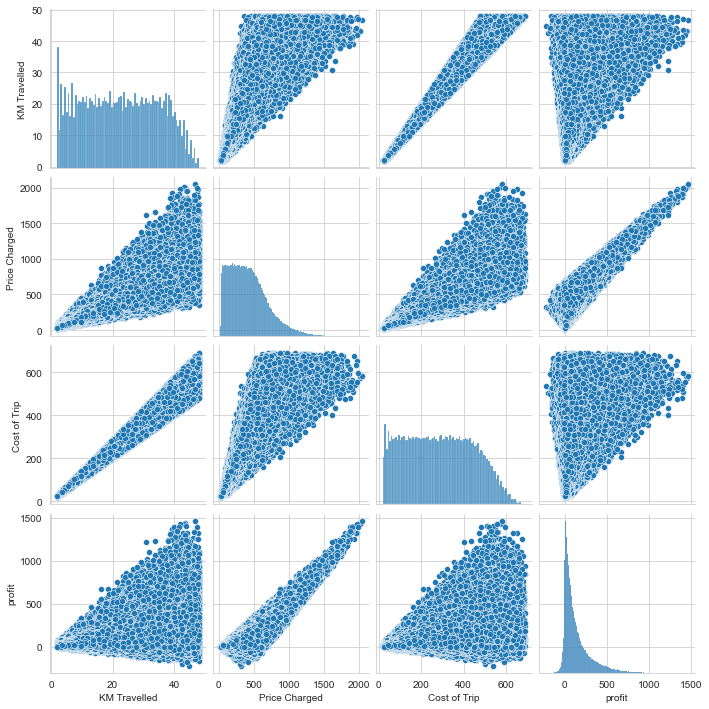

In [452]:
sns.pairplot(data=df_final[['KM Travelled', 'Price Charged', 'Cost of Trip', 'profit']])
plt.show()

## Number of Transactions for each Company

<AxesSubplot:title={'center':'Number of Transactions for each Company'}, xlabel='Company', ylabel='count'>

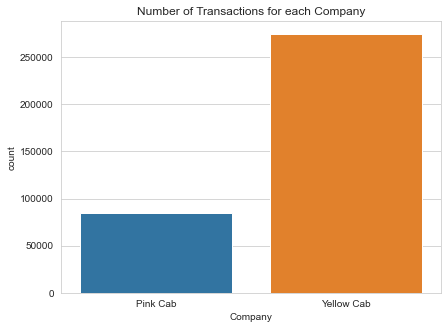

In [453]:
## check differences between Pink Cab and yellow Cab
fig = plt.figure(figsize=(15,5))

## 1,2,1 means one row,2 columns, the figure is the first one 
fig.add_subplot(1,2,1)
plt.title("Number of Transactions for each Company")
sns.set_style("whitegrid")
sns.countplot(x="Company", data=df_final)

From the plot we can see that the transactions in Yellow company is more than Pink.

## Average price charged of two companies

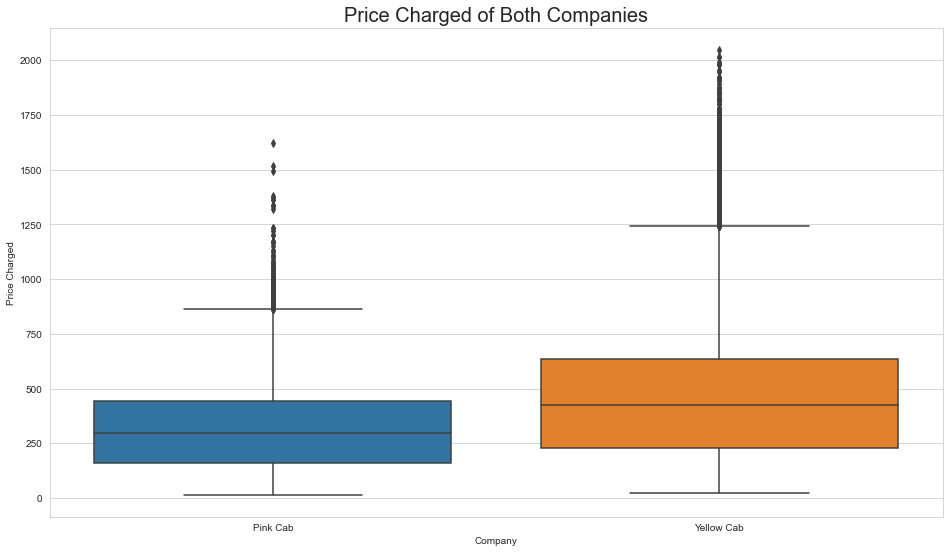

In [454]:
plt.figure(figsize = (16, 9))

sns.boxplot(df_final['Company'], df_final['Price Charged'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

As we can see, the average charged price of Yellow cab is higher than Pink Cab.

## Payment method Overview

<AxesSubplot:title={'center':'Total Transactions by Payment Method'}, xlabel='Company', ylabel='count'>

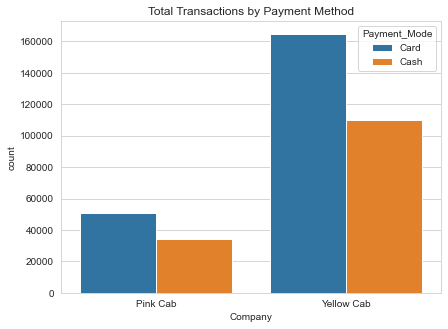

In [455]:
## check differences between Pink Cab and yellow Cab
fig = plt.figure(figsize=(15,5))

## 1,2,1 means one row,2 columns, the figure is the first one 
fig.add_subplot(1,2,1)
plt.title("Total Transactions by Payment Method")
sns.set_style("whitegrid")
sns.countplot(x="Company", hue="Payment_Mode", data=df_final)

From the plot above, we can see that card payment method is more popular than cash for both companies. 

## Profit for both companies each year

In [488]:
## average profit for pink cab
profit_pink = df_final[df_final.Company=='Pink Cab'].groupby('Year').sum()['profit']
profit_yellow = df_final[df_final.Company=='Yellow Cab'].groupby('Year').sum()['profit']

In [489]:
df_final['Year'].unique()

array([2016, 2018, 2017])

In [490]:
profit_pink.values

array([1739882.628, 2015100.657, 1552345.036])

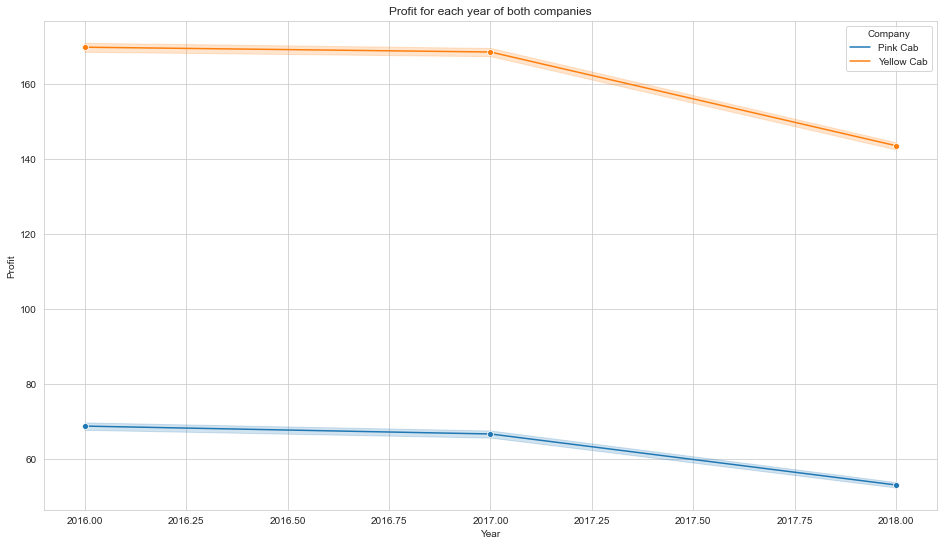

In [491]:
plt.figure(figsize = (16, 9))
sns.lineplot(x='Year', y='profit', hue="Company", data=df_final, marker = 'o')
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("Profit for each year of both companies")
plt.show()

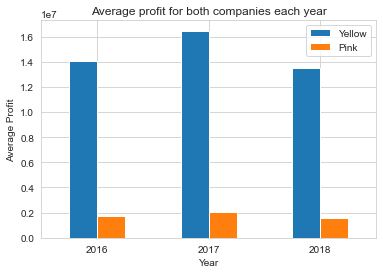

In [492]:
df = pd.DataFrame({'Yellow': profit_yellow.values,
                   'Pink': profit_pink.values}, index=sorted(df_final['Year'].unique()))
ax = df.plot.bar(rot=0)

plt.xlabel("Year")
plt.ylabel("Average Profit")
plt.title("Average profit for both companies each year")
plt.legend()
plt.show()

The profit for yellow cab is decreasing each year, the profit for pink cab has a visible decrease from 2017-2018.

In [461]:
profit_total_margin = df_final.groupby('Company').mean()['profit']

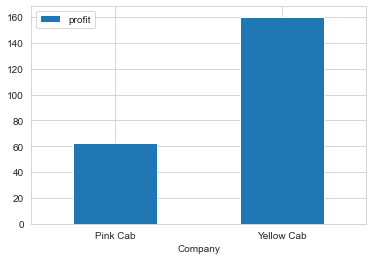

In [462]:
profit_total_margin.plot.bar(rot=0)
plt.legend()

The total average profit margin (cost - price charged) of Yellow cab is higher than Pink Cab.

## Gender Distributions

In [496]:
gender_sep = df_final.groupby(['Company', 'Gender']).mean()['profit']
print('Average profit of gender for each company')
gender_sep

Average profit of gender for each company


Company     Gender
Pink Cab    Female     62.180701
            Male       63.026310
Yellow Cab  Female    156.305325
            Male      163.150948
Name: profit, dtype: float64

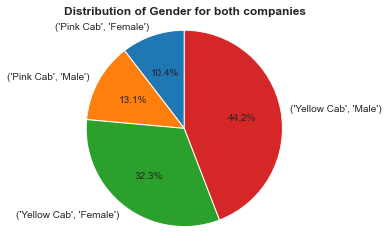

In [464]:
plt.figure()
plt.pie(gender_sep.values, labels=gender_sep.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender for both companies',fontweight='bold', loc = 'center')
plt.axis('equal')
plt.show()

Yellow Cab has more customers, Male are more than female for both companies.

In [465]:
##Hypothesis test using stats method:
## hypothesis: there is a difference in profit regarding gender for both companies.
g_pink_m = df_final[(df_final['Gender']=='Male')&(df_final.Company=='Pink Cab')].groupby('Customer ID').profit.mean()
g_yellow_f = df_final[(df_final['Gender']=='Female')&(df_final.Company=='Yellow Cab')].groupby('Customer ID').profit.mean()
g_pink_f = df_final[(df_final['Gender']=='Female')&(df_final.Company=='Pink Cab')].groupby('Customer ID').profit.mean()
g_yellow_m = df_final[(df_final['Gender']=='Male')&(df_final.Company=='Yellow Cab')].groupby('Customer ID').profit.mean()

ttest_pink = stats.ttest_ind(g_pink_m.values, g_pink_f.values)
ttest_yellow = stats.ttest_ind(g_yellow_m.values, g_yellow_f.values)

tstat_pink = ttest_pink.statistic
pval_pink = ttest_pink.pvalue

tstat_yellow = ttest_yellow.statistic
pval_yellow = ttest_yellow.pvalue

print("t-stat for yellow cab: {}".format(tstat_yellow))
print("p-value for yellow cab: {}".format(pval_yellow))
print('\n')
print("t-stat for pink cab: {}".format(tstat_pink))
print("p-value for pink cab: {}".format(pval_pink))

t-stat for yellow cab: 2.785616066253197
p-value for yellow cab: 0.005345131177690455


t-stat for pink cab: 0.5403746407894268
p-value for pink cab: 0.5889424154257256


Since P-value for yeallo cab is less than 0.05 and t-test is > 1.96, we reject the null hypohthesis. Thus, there is a difference in profit regarding gender for yellow cab.

On the other hand, we fail to reject null hypothesis for pink cab. Thus, there is no difference in profit regarding gender for pink cab.

## Age Distributions 

In [466]:
age_sep = df_final.groupby(['Company', 'Age']).count()['Customer ID']

<AxesSubplot:title={'center':'Age Distributions of customers for both companies'}, xlabel='Age', ylabel='Count'>

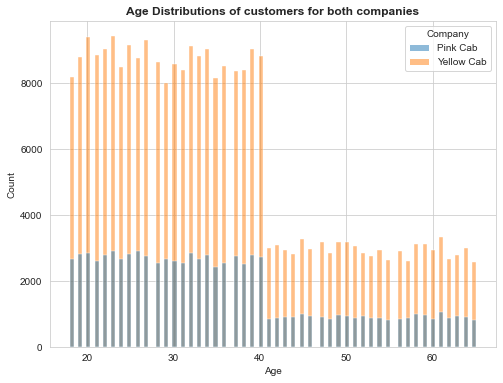

In [467]:
# plot
plt.figure(figsize=(8,6))
plt.title("Age Distributions of customers for both companies", fontweight="bold")
sns.set_style("whitegrid")
sns.histplot(data=df_final, x='Age', hue='Company')

Most of the customers are in the age group 18-40. 20- 30 age group has the most amount for yellow cab.

## Average Income of the customer for both companies

In [468]:
df_final.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users', 'profit',
       'Year', 'month', 'day'],
      dtype='object')

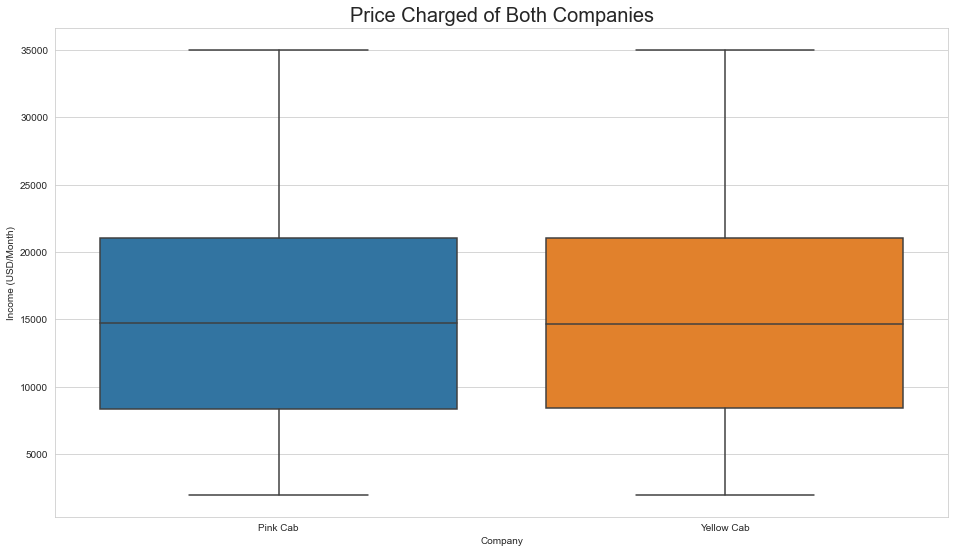

In [469]:
plt.figure(figsize = (16, 9))

sns.boxplot(df_final['Company'], df_final['Income (USD/Month)'])
plt.title('Price Charged of Both Companies', fontsize=20)
plt.show()

We can see the average income is about 15000 usd/month for both compnaies' customers.

## Locations Distributions on Profit

<AxesSubplot:xlabel='profit', ylabel='City'>

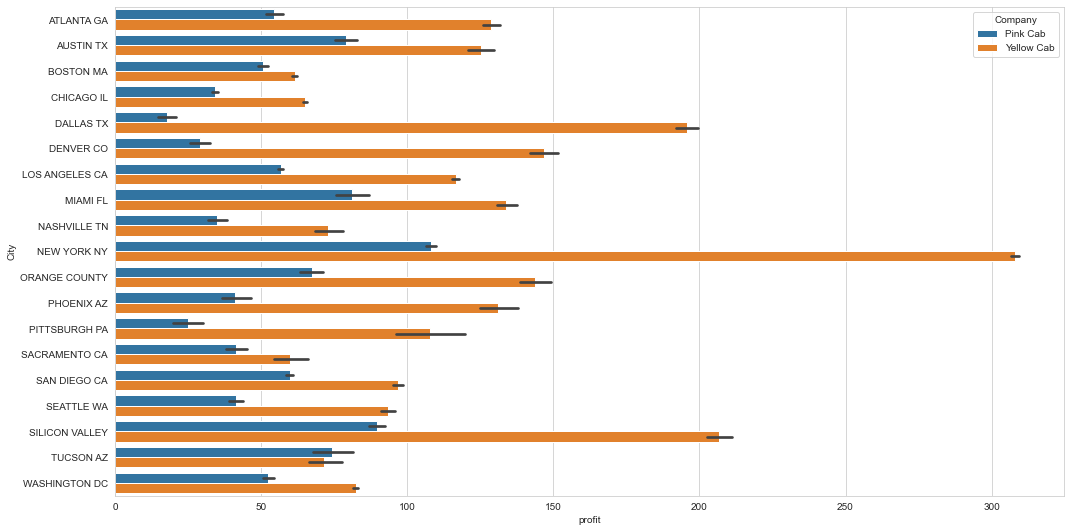

In [470]:
plt.figure(figsize = (17, 9))
sns.barplot(x="profit", y="City", data=df_final,hue='Company')

New York city has the most Yellow Cab and Pink Cab customers. Dallas and Silcon Valley are the second for the yellow cab.

## Users Percentage per City

In [471]:
df_final['User_%'] = df_final['Users'] / df_final['Population']

In [472]:
cab_data[cab_data['City'] == 'NEW YORK NY']

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
128,10000139,07-01-2016,Pink Cab,NEW YORK NY,17.85,242.90,198.1350
129,10000140,08-01-2016,Pink Cab,NEW YORK NY,25.30,407.21,255.5300
130,10000141,05-01-2016,Pink Cab,NEW YORK NY,16.32,236.41,186.0480
131,10000142,03-01-2016,Pink Cab,NEW YORK NY,12.43,194.61,144.1880
132,10000143,08-01-2016,Pink Cab,NEW YORK NY,29.70,434.57,350.4600
...,...,...,...,...,...,...,...
358945,10439358,01-01-2018,Yellow Cab,NEW YORK NY,16.64,354.95,207.6672
358946,10439360,08-01-2018,Yellow Cab,NEW YORK NY,26.18,515.49,348.7176
358947,10439361,02-01-2018,Yellow Cab,NEW YORK NY,42.18,795.93,511.2216
358948,10439362,04-01-2018,Yellow Cab,NEW YORK NY,12.60,300.79,151.2000


In [473]:
cab_data['City']

0            ATLANTA GA
1            ATLANTA GA
2            ATLANTA GA
3            ATLANTA GA
4            ATLANTA GA
              ...      
359387    WASHINGTON DC
359388    WASHINGTON DC
359389    WASHINGTON DC
359390    WASHINGTON DC
359391    WASHINGTON DC
Name: City, Length: 359392, dtype: object

In [474]:
for x in city['City'].unique():
    if x not in cab_data['City'].unique():
        print (x)

SAN FRANCISCO CA


Findings: Yellow cab and pink cab don't have any users live in SAN FRANCISCO CA

<AxesSubplot:xlabel='User_%', ylabel='City'>

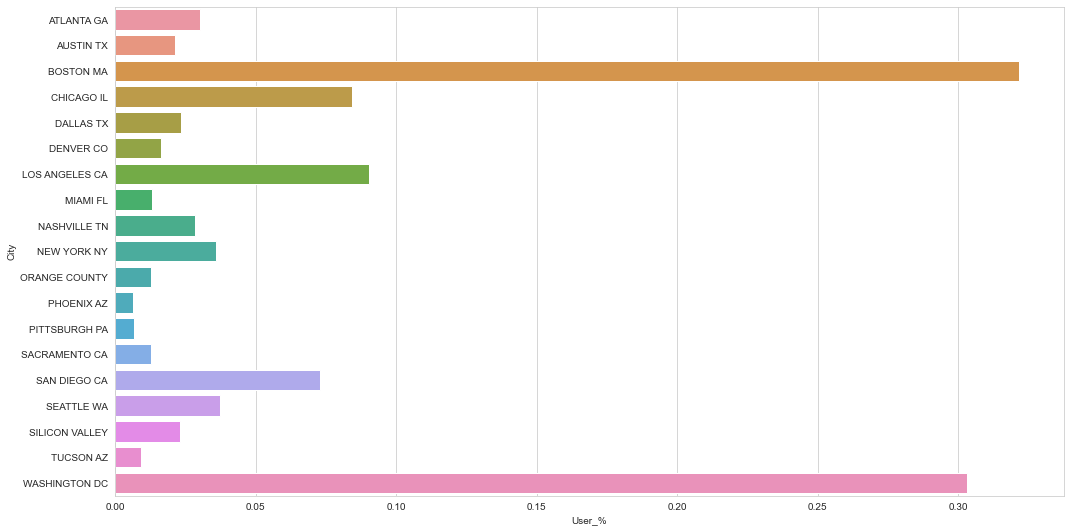

In [475]:
plt.figure(figsize = (17, 9))
sns.barplot(x="User_%", y="City", data=df_final)

Boston and Washington has the most percentage of users >= 30%.